In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl #Some more style nonsense
from scipy.stats import linregress #linear regression
from scipy.optimize import curve_fit

mpl.rcParams['figure.figsize'] = [16.0, 9.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=300 # dots per inch

from Spectrav2 import spectra #Main tool

In [2]:
#import data
Co = np.loadtxt("co60_211118.txt")
bkg = np.loadtxt("18oct2021_bkg_ortec.txt")

print(np.shape(Co),np.shape(bkg))

(16384,) (16384,)


In [3]:
no1 = spectra(Co)
#no1.cali_exam(0,2000)

#calibration (Co60)
no1.cali_add_peak(no1.cali_fit_peak(1491,1499)) #,plot = True)#,plot = True,printout = True)
no1.cali_add_peak(no1.cali_fit_peak(1695,1701)) #,plot = True)#,plot = True,printout = True)
no1.cali_print_peaks()
no1.get_cali([1173.2,1332.5])
no1.cali_info()
no1.ifcali

Photopeaks (ch)
peak1 = 1493.997850+- 0.003146

peak2 = 1696.922210+- 0.002556

Calibration constants
m = 0.785022+- 0.000016
c = 0.379461+- 0.002470
p = 0.000000+- 0.000000



True

In [4]:
# no1.clear_peaks()
# no1.add_peaks([no1.fit_peak(1140,1210),no1.fit_peak(1300,1370),no1.fit_peak(2500,2512)])
# fig,axs = plt.subplots()
# no1.spectra(800,1400,axs = axs,log = True)
# no1.label_peaks(axs,n2 = 2)
# no1.ComptonEdge(axs,n2 = 2)

In [5]:
# fig,axs = plt.subplots()
# no1.spectra(2100,2600,axs = axs,log = True)
# no1.label_peaks(axs,n1 = 2,n2 = 3)
# no1.ComptonEdge(axs,n1 = 2,n2 = 3)

In [6]:
Bi = spectra(np.loadtxt("bi207_211118.txt"),label = "Bi207")
#Bi.cali_exam(2250,2260)


In [7]:
# Bi.get_E_scale(*no1.cali_info())
# Bi.clear_peaks()
# Bi.add_peaks((Bi.fit_peak(568,575),Bi.fit_peak(1057,1074),Bi.fit_peak(1768,1776)))
# fig,axs = plt.subplots()
# Bi.spectra(400,2000,axs = axs,log = True)
# Bi.label_peaks(axs,n2 = 3)
#Bi.ComptonEdge(axs,n2 = 3)

Photopeaks (ch) of Bi207
peak1 = 725.080058+- 0.007319

peak2 = 1354.409630+- 0.008377

peak3 = 2254.546314+- 0.011103



((0.7851066259282864, 8.61201550626021e-06),
 (0.3966595763218499, 0.011812247435751436),
 (0, 0))

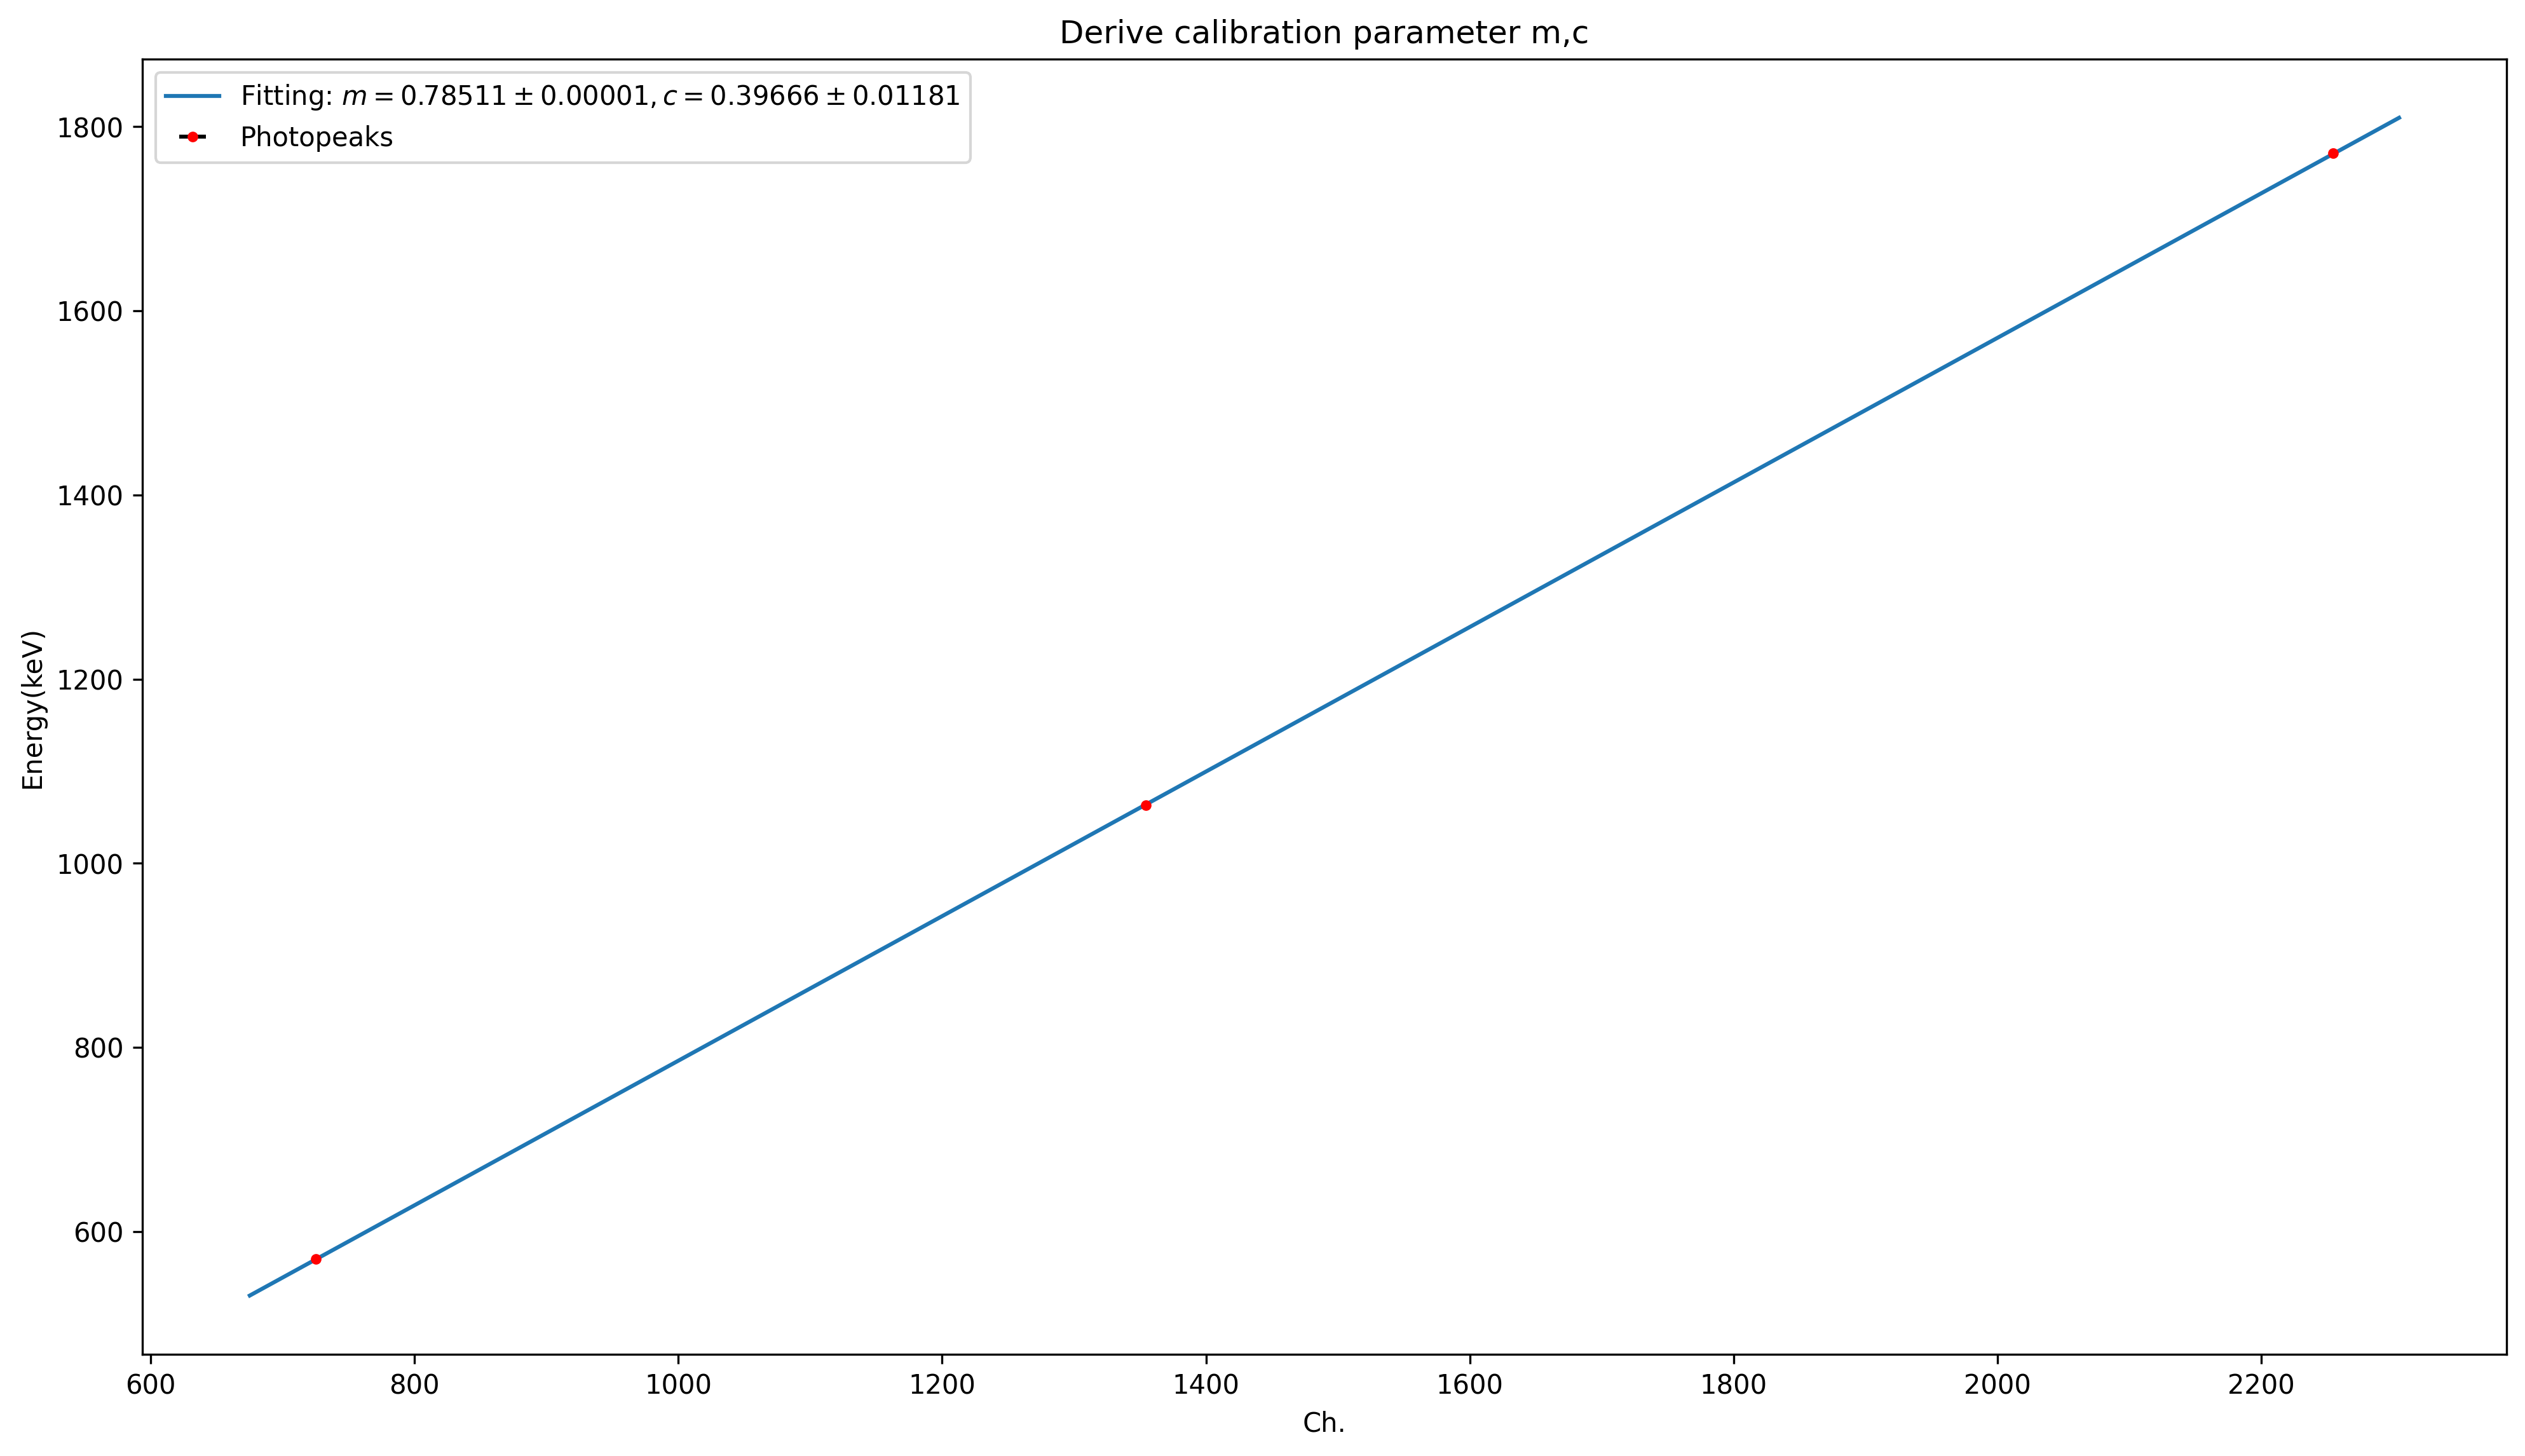

In [8]:
#Bi.cali_fit_peak(723,729,plot=True,chi2test=True,log=False)
#Bi.cali_fit_peak(1350,1360,plot=True,chi2test=True,log=False)
#Bi.cali_fit_peak(2251,2261,plot=True,chi2test=True,log=False)

#calibration (Bi207)
Bi.cali_add_peaks((Bi.cali_fit_peak(723,729),Bi.cali_fit_peak(1350,1360),Bi.cali_fit_peak(2251,2261)))
Bi.cali_print_peaks()
Bi.get_cali([570,1063,1771],plot=True)

Calibration constants in Bi207 spectra
m = 0.785107+- 0.000009
c = 0.396660+- 0.011812
p = 0.000000+- 0.000000



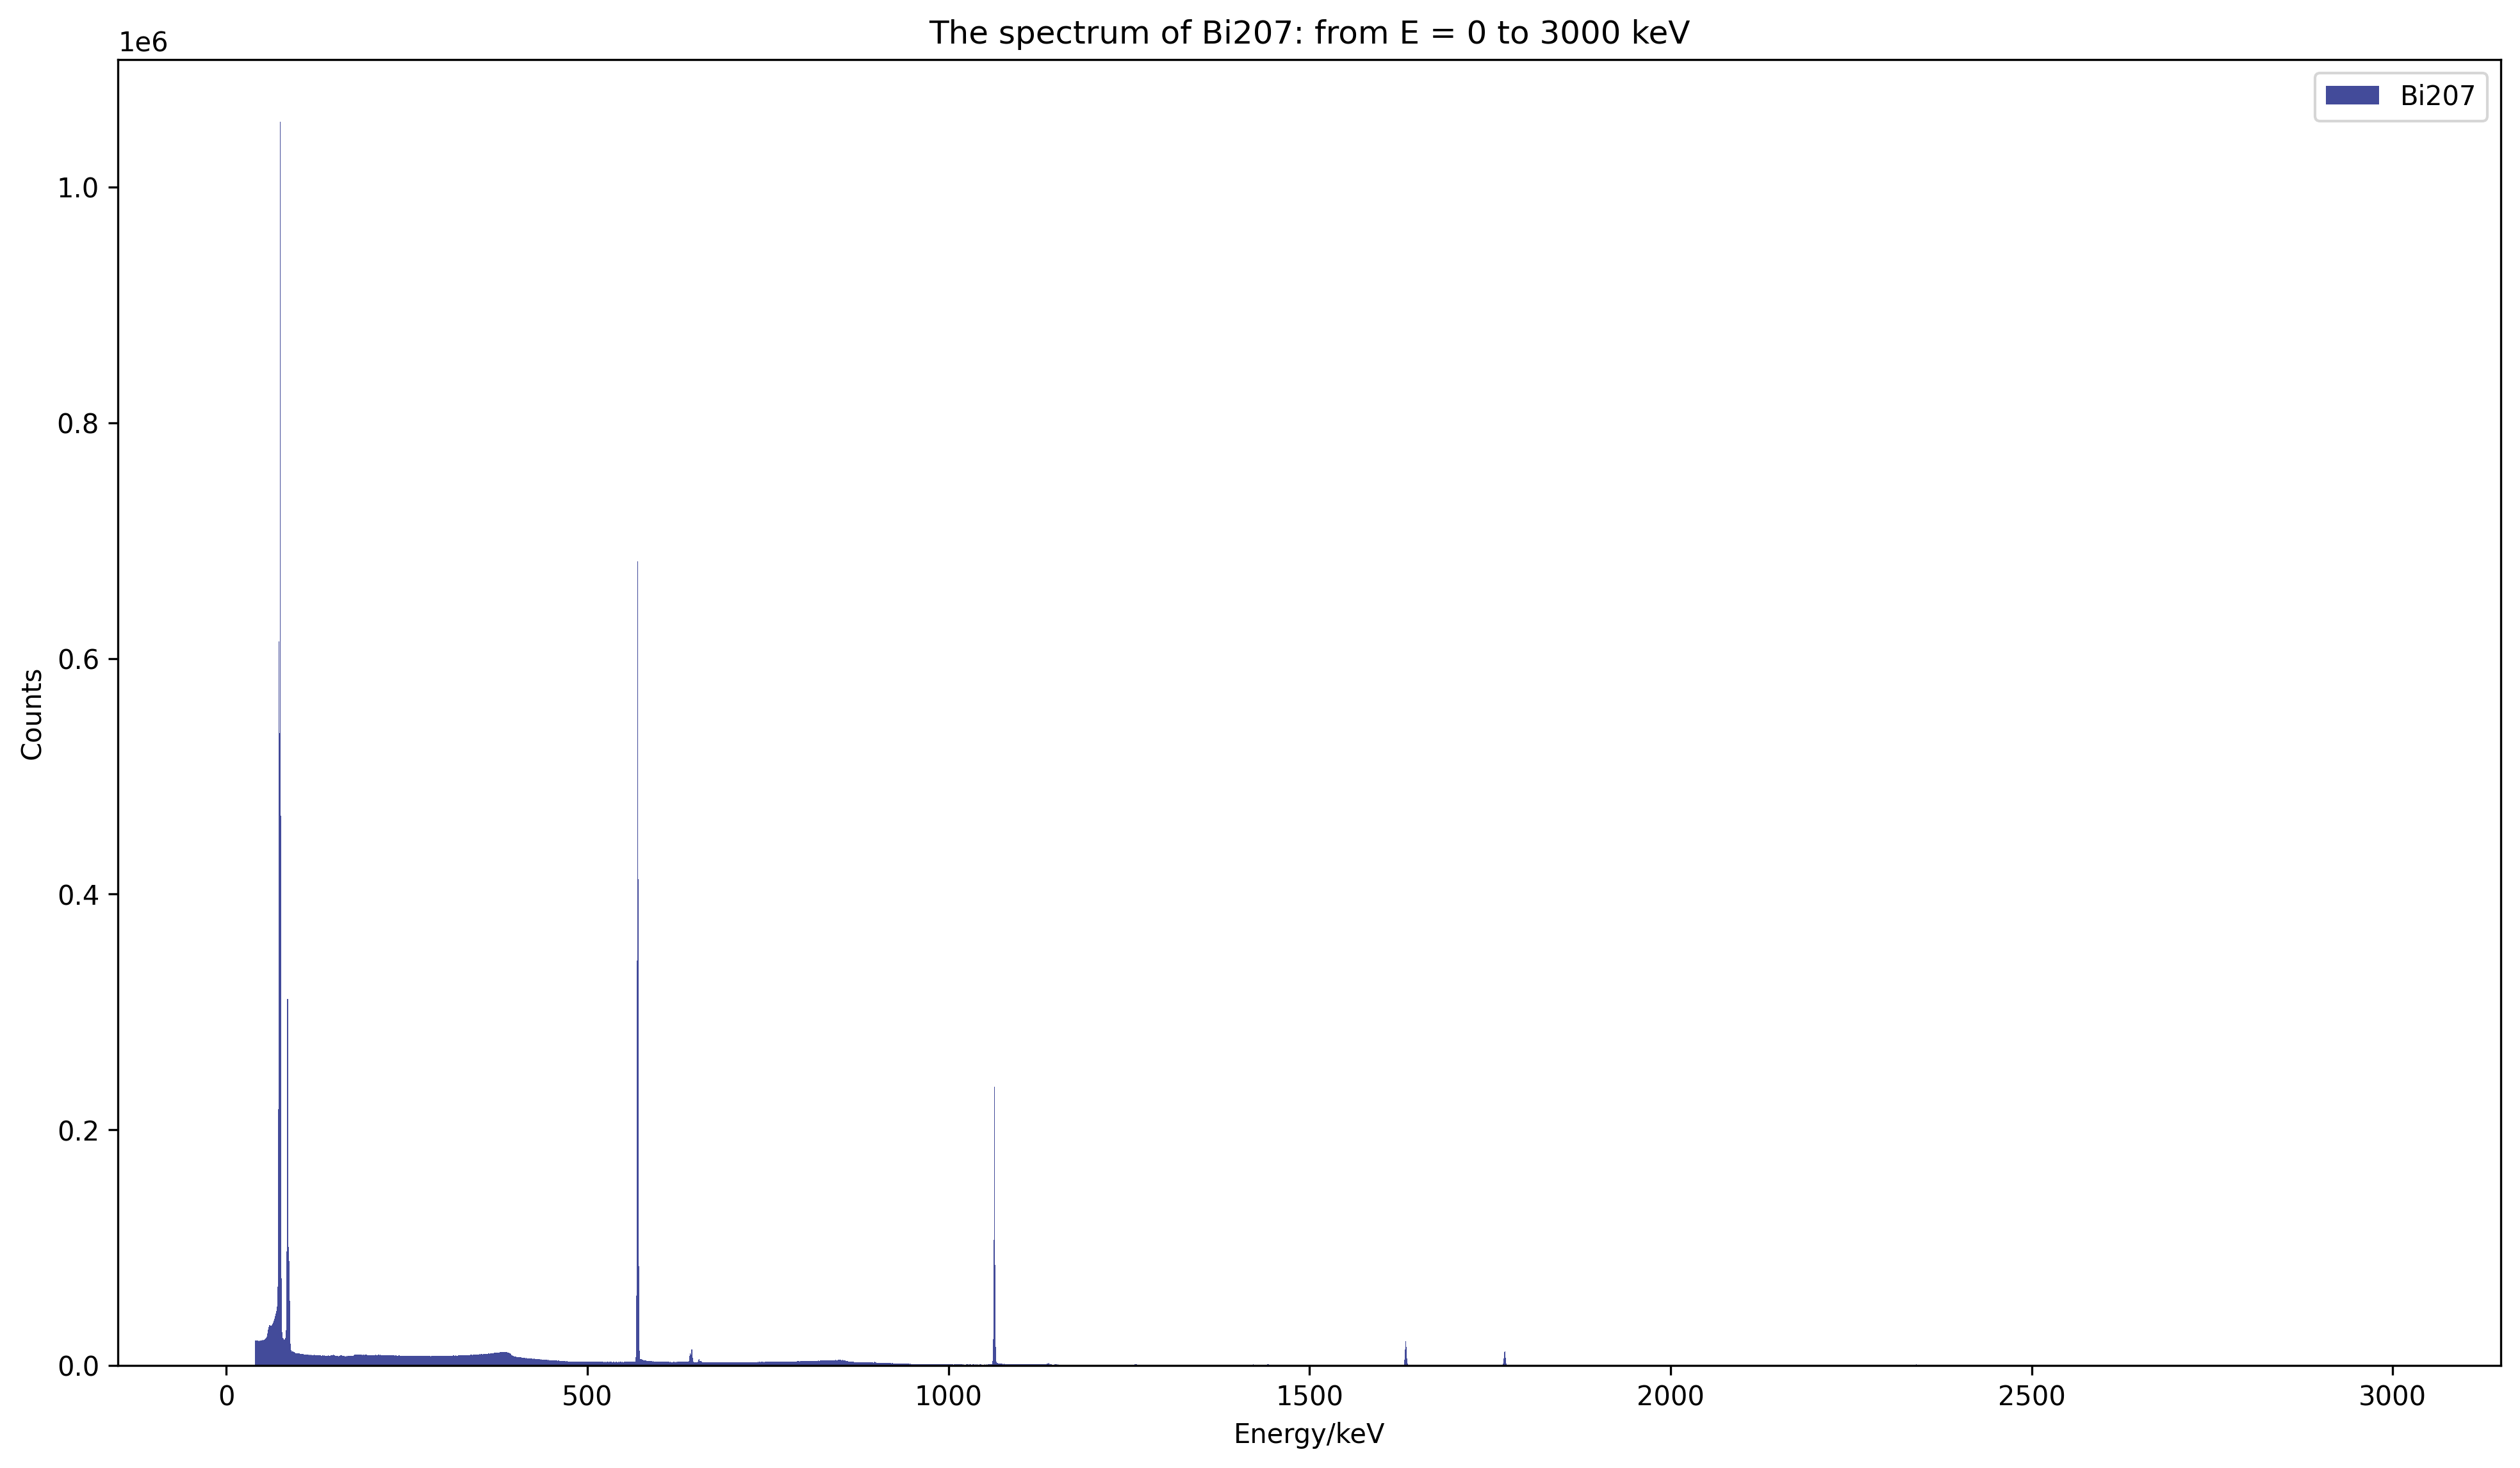

In [9]:
Bi.cali_info()#show parameters used
Bi.spectra()#log=True to get log scale

Photopeaks (ch)
peak1 = 725.080058+- 0.007319

peak2 = 1354.409630+- 0.008377

peak3 = 1493.997850+- 0.003146

peak4 = 1696.922210+- 0.002556

peak5 = 2254.546314+- 0.011103



((0.7849992978979521, 6.9287749336178395e-06),
 (0.43143725954813855, 0.010997098003891908),
 (0, 0))

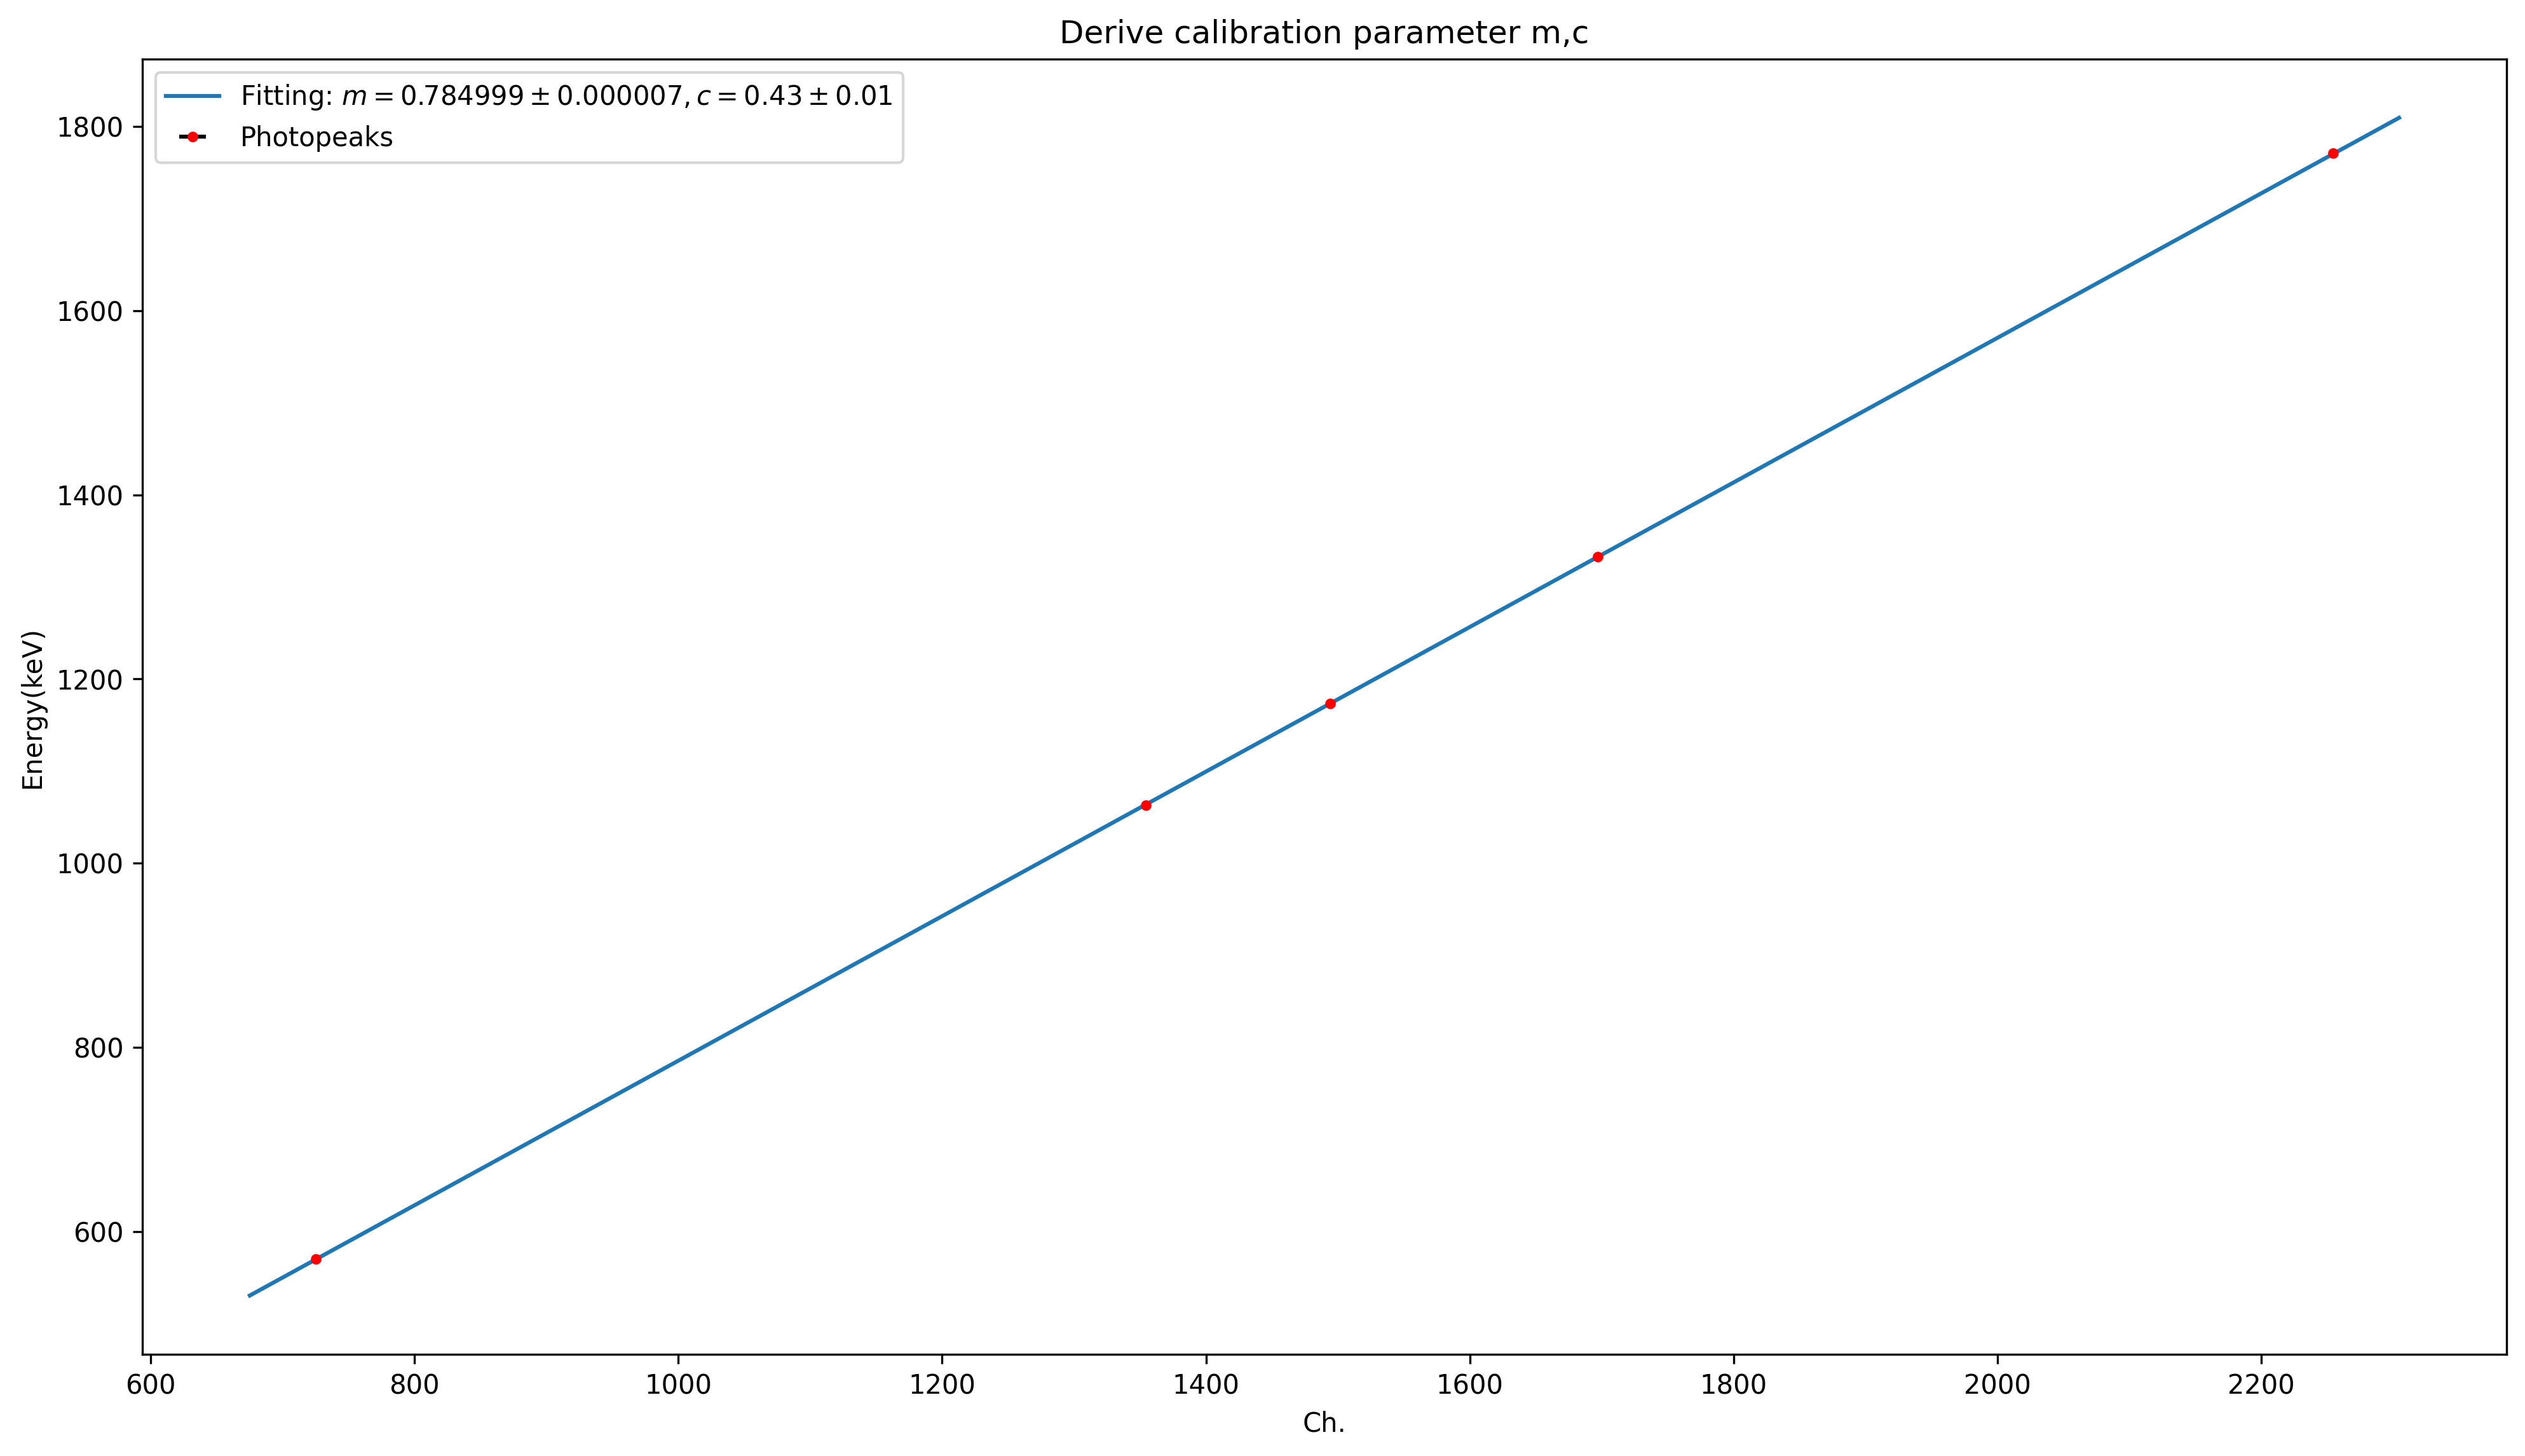

In [17]:
#a functional spectra which records peaks from both Co and Bi 
#and thus capable of fitting on all 5 points for calibration parameters
Empty = spectra(Co)
Empty.cali_add_peaks(no1.cali_peaks)
Empty.cali_add_peaks(Bi.cali_peaks)

#show peaks
Empty.cali_print_peaks()

Empty.get_cali([570,1063,1173.2,1332.5,1771],deg = 1,plot=True,perc=[2,6,2])

In [11]:
Empty.E_err(1000)#Err could blow up

39661.91545616762

Calibration constants
m = 0.781854+- 0.000000
c = 2.457151+- 0.000035
p = 0.000001+- 0.024475



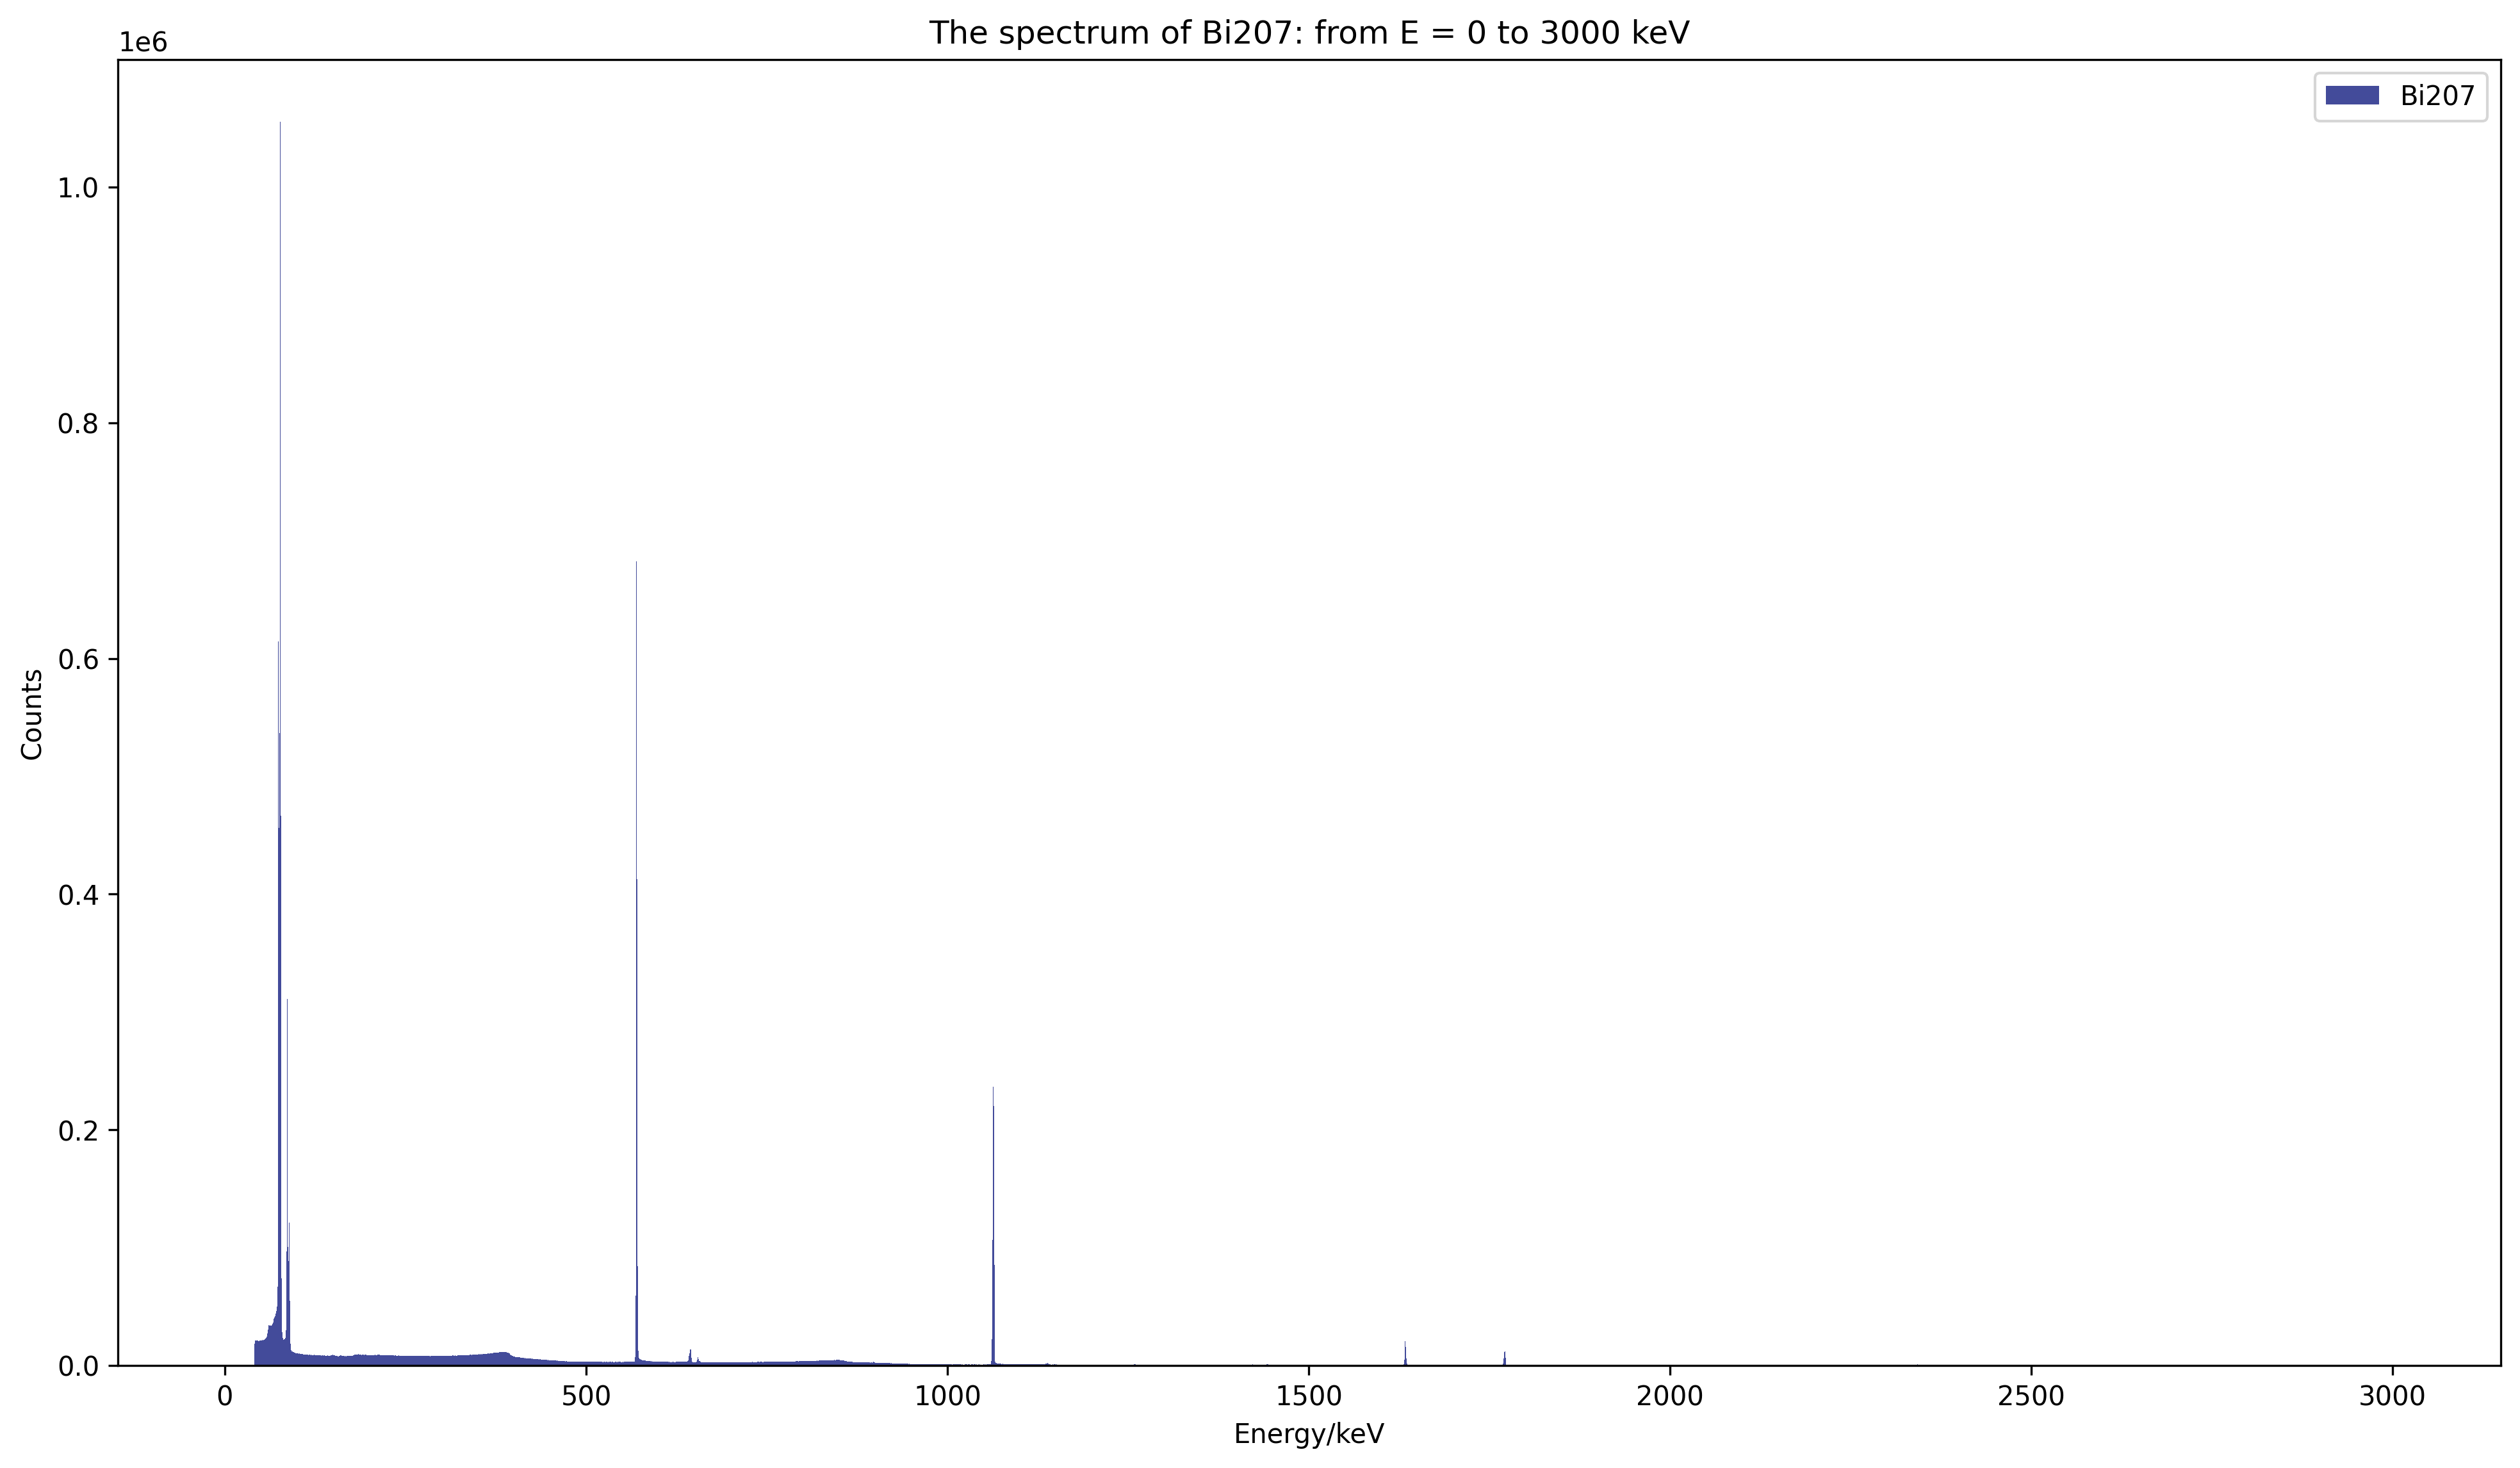

In [12]:
Bi.get_E_scale(*Empty.cali_info())#passing calibration
Bi.spectra()